In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_score

# 모델 학습
from sklearn.linear_model import LinearRegression, SGDRegressor

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.ensemble import RandomForestClassifier, VotingClassifier, BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from sklearn.cluster import KMeans

from sklearn.decomposition import PCA

# 성능 평가
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import roc_auc_score

from sklearn.metrics import mean_squared_error, r2_score

from sklearn.metrics import silhouette_score

# 경고 메세지 숨김
import warnings     
warnings.filterwarnings('ignore')

In [3]:
# 도미, 빙어
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [4]:
# 입력
fish_data = np.column_stack( (fish_length, fish_weight) )

print(fish_data[0:5])

[[ 25.4 242. ]
 [ 26.3 290. ]
 [ 26.5 340. ]
 [ 29.  363. ]
 [ 29.  430. ]]


In [5]:
# 타겟
fish_target = np.concatenate( (np.ones(35), np.zeros(14)) )

print(fish_target)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]


# 데이터 분할

In [6]:
xtrain, xtest, ytrain, ytest = train_test_split(
    fish_data, fish_target              # x: 특성, y: 정답
#    , test_size = 0.3         # 테스트 데이터 비율
    , stratify = fish_target       # 계층화(훈련＆테스트 데이터 비율: x=y)
    , random_state = 42     # 랜덤 시드
    )

In [7]:
print(xtrain.shape, xtest.shape)

(36, 2) (13, 2)


In [8]:
print(ytrain.shape, ytest.shape)

(36,) (13,)


In [9]:
print(ytest)

[0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1.]


# 분류

In [10]:
kn = KNeighborsClassifier()
kn.fit(xtrain, ytrain)        # 모델 학습

kn.score(xtest, ytest)

1.0

In [11]:
kn.predict([[25, 150]])

array([0.])

# 산점도

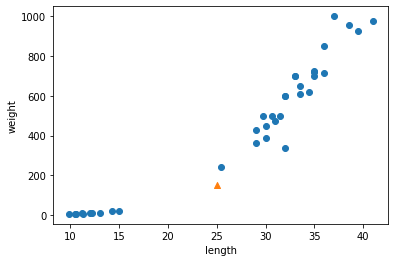

In [12]:
plt.scatter(xtrain[:,0], xtrain[:,1])
plt.scatter(25, 150, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

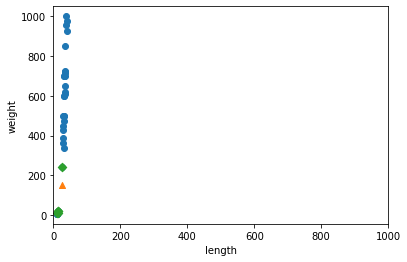

In [22]:
distances, indexes = kn.kneighbors([[25, 150]])

plt.scatter(xtrain[:,0], xtrain[:,1])
plt.scatter(25, 150, marker='^')
plt.scatter(xtrain[indexes,0], xtrain[indexes,1], marker='D')
plt.xlim( (0, 1000) )
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

# 데이터 스케일링

In [31]:
ss = StandardScaler()

xtrain_scaled = ss.fit_transform(xtrain)    # 훈련 데이터 → 스케일링
xtest_scaled = ss.transform(xtest)          # 테스트 데이터 → 스케일링

# K-최근접 이웃

In [25]:
knc = KNeighborsClassifier()
knc.fit(xtrain_scaled, ytrain)        # 모델 학습

knc.classes_       # 타겟 목록

array([0., 1.])

In [26]:
knc.score( xtrain_scaled, ytrain )     # 훈련 데이터 정확도(스케일링)

1.0

In [27]:
knc.score( xtest_scaled, ytest )       # 테스트 데이터 정확도(스케일링)

1.0